In [1]:
import pandas as pd
import numpy as np


In [2]:
#import necessary packages
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from math import sqrt
from scipy.stats import sem
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
#Import the data --> this file represents only the train set
data = pd.read_csv("Train_set_CC.csv", encoding = "latin-1")
del data["Unnamed: 0"]
data.head()

,FV_D,FV_M,FV_DATE,VISIT_CODE,WP_ID,NAICS,RegCode,INDCode,HICCode,HICPerCode,E1524Code,E2554Code,E55pCode,ConCode,Claims_Code
0,29,6,2019-06-29,2019-06-29 2093649,2093649,812115,3,10,1,2,1,1,2,1,1
1,25,2,2019-02-25,2019-02-25 1095872,1095872,812330,2,10,2,2,1,1,2,4,1
2,19,6,2019-06-19,2019-06-19 2091294,2091294,812190,2,10,2,2,1,1,2,4,1
3,6,5,2019-05-06,2019-05-06 2029237,2029237,238990,4,4,5,5,2,2,2,1,3
4,25,10,2019-10-25,2019-10-25 2125435,2125435,236110,4,4,5,5,2,2,2,3,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19070 entries, 0 to 19069
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FV_D         19070 non-null  int64 
 1   FV_M         19070 non-null  int64 
 2   FV_DATE      19070 non-null  object
 3   VISIT_CODE   19070 non-null  object
 4   WP_ID        19070 non-null  int64 
 5   NAICS        19070 non-null  int64 
 6   RegCode      19070 non-null  int64 
 7   INDCode      19070 non-null  int64 
 8   HICCode      19070 non-null  int64 
 9   HICPerCode   19070 non-null  int64 
 10  E1524Code    19070 non-null  int64 
 11  E2554Code    19070 non-null  int64 
 12  E55pCode     19070 non-null  int64 
 13  ConCode      19070 non-null  int64 
 14  Claims_Code  19070 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 2.2+ MB


In [6]:
data.isnull().sum()

FV_D           0
FV_M           0
FV_DATE        0
VISIT_CODE     0
WP_ID          0
NAICS          0
RegCode        0
INDCode        0
HICCode        0
HICPerCode     0
E1524Code      0
E2554Code      0
E55pCode       0
ConCode        0
Claims_Code    0
dtype: int64

Split data into 70:30 train / validation sets

In [6]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#includes all features

X = data.drop(['FV_DATE', 'VISIT_CODE','Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['FV_D', 'FV_M', 'WP_ID', 'NAICS', 'RegCode', 'INDCode', 'HICCode', 'HICPerCode', 'E1524Code', 'E2554Code', 'E55pCode', 'ConCode']
(19070, 12) (19070,)
4    4527
1    4089
2    4063
5    3377
3    3014
Name: Claims_Code, dtype: int64


In [7]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#features identified during Feature Selection via RFE  -->  RegCode, INDCode, HICCode, E2554Code

X = data.drop(['FV_D', 'FV_M','FV_DATE', 'VISIT_CODE', 'WP_ID', 'NAICS', 'HICPerCode','E1524Code', 'E55pCode','ConCode','Claims_Code'], axis=1)
y = data['Claims_Code']
print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['RegCode', 'INDCode', 'HICCode', 'E2554Code']
(19070, 4) (19070,)
4    4527
1    4089
2    4063
5    3377
3    3014
Name: Claims_Code, dtype: int64


In [42]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#features identified during Feature Selection via chi^2 method -->  'WP_ID', 'NAICS','INDCode', 'HICCode', 'HICPerCode'
X = data.drop(['FV_D', 'FV_M', 'FV_DATE', 'VISIT_CODE', 'RegCode', 'E2554Code', 'E1524Code', 'E55pCode','ConCode', 'Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['WP_ID', 'NAICS', 'INDCode', 'HICCode', 'HICPerCode']
(19070, 5) (19070,)
4    4527
1    4089
2    4063
5    3377
3    3014
Name: Claims_Code, dtype: int64


In [43]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y,  train_size = .70, random_state = 23)

K NEAREST NEIGHBOURS MODEL

In [12]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [24]:
#Testing for optimal K value around k = sqrt(n)
sqrt(len(X_tr))

115.53787257864843

In [39]:
for k in [1,3,5,10,50,100,200]:
    Optimal_K = KNeighborsClassifier(n_neighbors=k).fit(X_tr, y_tr)
    ypred = Optimal_K.predict(X_ts)
    print('for k = %3i accuracy is %.3f'
         %(k, metrics.accuracy_score(y_ts, ypred)))

for k =   1 accuracy is 0.646
for k =   3 accuracy is 0.593
for k =   5 accuracy is 0.581
for k =  10 accuracy is 0.561
for k =  50 accuracy is 0.539
for k = 100 accuracy is 0.526
for k = 200 accuracy is 0.507


Text(0, 0.5, 'Model accuracy')

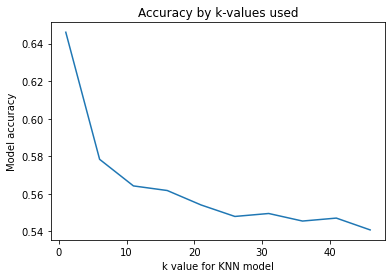

In [40]:
#checking error rate with different k values using loop
score = []
Krange = range(1,50,5)
for k in Krange :
    Optimal_K = KNeighborsClassifier(n_neighbors=k)
    Optimal_K.fit(X_tr, y_tr)
    ypred = Optimal_K.predict(X_ts)
    score.append(metrics.accuracy_score(y_ts,  ypred))

plt.plot(Krange,score)
plt.title("Accuracy by k-values used")
plt.xlabel("k value for KNN model")
plt.ylabel('Model accuracy')

In [60]:
#configure the KNN function for KNN classification model

KNN_model = KNeighborsClassifier(n_neighbors=3) 
KNN_model.fit(X_tr, y_tr) 
print(KNN_model.fit(X_tr, y_tr))

KNeighborsClassifier(n_neighbors=3)


In [61]:
y_predicted = KNN_model.predict(X_ts)

In [62]:
#Create confusion matrix

from sklearn.metrics import confusion_matrix
con_matx = confusion_matrix(y_ts, y_predicted)
print(con_matx)

[[977 112  56  88  15]
 [179 554 138 261  78]
 [133 251 288 175  55]
 [154 357 140 712  24]
 [ 28  42  27  13 864]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_ts, y_predicted))

              precision    recall  f1-score   support

           1       0.72      0.75      0.73      1248
           2       0.40      0.45      0.42      1210
           3       0.39      0.33      0.36       902
           4       0.54      0.48      0.51      1387
           5       0.82      0.91      0.87       974

    accuracy                           0.58      5721
   macro avg       0.57      0.58      0.58      5721
weighted avg       0.57      0.58      0.58      5721



In [63]:
# create function to evaluate the Repeated k-fold model
def mod_eval(X, y, Reps):
    cv = RepeatedKFold(n_splits=10, n_repeats=Reps, random_state=23)
    model = KNeighborsClassifier(n_neighbors=3)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# configurations to test
Reps = range(1,11)
results = list()
for r in Reps:
    scores = mod_eval(X, y, r)
    print('Run -> %d mean=%.4f se=%.3f' % (r, mean(scores), stats.sem(scores)))
    results.append(scores)

Run -> 1 mean=0.6061 se=0.003
Run -> 2 mean=0.6042 se=0.003
Run -> 3 mean=0.6052 se=0.002
Run -> 4 mean=0.6054 se=0.002
Run -> 5 mean=0.6054 se=0.001
Run -> 6 mean=0.6052 se=0.001
Run -> 7 mean=0.6054 se=0.001
Run -> 8 mean=0.6052 se=0.001
Run -> 9 mean=0.6050 se=0.001
Run -> 10 mean=0.6052 se=0.001


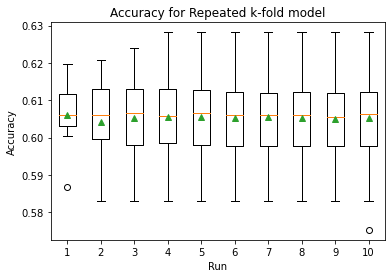

In [64]:
#plot the average accuracy

plt.boxplot(results, labels=[str(r) for r in Reps], showmeans=True)
plt.title('Accuracy for Repeated k-fold model')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.show()


In [65]:
# create function to evaluate the model
def mod_eval(X, y, Reps):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=Reps, random_state=23)
    model = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# configurations to test
Reps = range(1,11)
results = list()
for r in Reps:
    scores = mod_eval(X, y, r)
    print('Run -> %d mean=%.4f se=%.3f' % (r, mean(scores), stats.sem(scores)))
    results.append(scores)

Run -> 1 mean=0.5885 se=0.003
Run -> 2 mean=0.5905 se=0.002
Run -> 3 mean=0.5906 se=0.002
Run -> 4 mean=0.5902 se=0.001
Run -> 5 mean=0.5902 se=0.001
Run -> 6 mean=0.5901 se=0.001
Run -> 7 mean=0.5899 se=0.001
Run -> 8 mean=0.5893 se=0.001
Run -> 9 mean=0.5894 se=0.001
Run -> 10 mean=0.5895 se=0.001


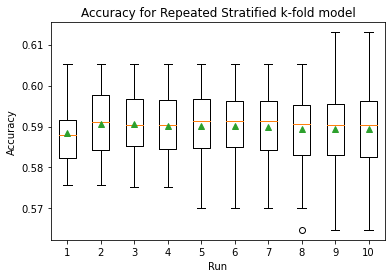

In [66]:
#plot the average accuracy

plt.boxplot(results, labels=[str(r) for r in Reps], showmeans=True)
plt.title('Accuracy for Repeated Stratified k-fold model')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.show()